# USG grants crawl
## Co-Occurrence frequency analysis, within-agency

### Previously

In the previous chapter we looked at how often a selected set of open-science infrastructure related terms from [Lee & Chung (2022)](https://doi.org/10.47989/irpaper949) showed up in [grants.gov](https://www.grants.gov/web/grants) grant descriptions, and which agencies' grants they were showing up in.  

For the purposes of our investigation though, we might be curious how frequently certian words are occuring together, _within a specific agency_.  In this way we might get a better sense of the particulars of the kinds of topics discssed within that agency.  We may even be able to identify patterns when comparing agencies that would allow us to make comparisons _between_ agencies, or groups thereof.

### Loading the database once more

Let's begin by loading up the database provided by the website, which is stored in an xml format.

In [7]:
# import our helper functions
import sys
import os
sys.path.insert(0, os.path.abspath('../src'))
sys.path
import grantsGov_utilities as grantsGov_utilities

# local data storage directory
localDataDir='inputData'

grantsDF=grantsGov_utilities.detectLocalGrantData(localPath='../'+localDataDir,forceDownload=True)
grantsDF

../inputData\GrantsDBExtract20230411v2.xml


,OpportunityID,OpportunityTitle,OpportunityNumber,AgencyCode,AgencyName,LastUpdatedDate,AwardCeiling,AwardFloor,EstimatedTotalProgramFunding,ExpectedNumberOfAwards,Description
0,262148,Establishment of the Edmund S. Muskie Graduate...,SCAPPD-14-AW-161-SCA-08152014,DOS-SA,Bureau of South and Central Asian Affairs,08/20/2014,600000,400000,600000,1,The Office of Press and Public Diplomacy of th...
1,262149,Eradication of Yellow Crazy Ants on Johnston A...,F14AS00402,DOI-FWS,Fish and Wildlife Service,08/15/2014,0,0,0,NaN,Funds under this award are to be used for the ...
2,131073,"Cooperative Ecosystem Studies Unit, Piedmont S...",G12AS20003,DOI-USGS1,Geological Survey,11/28/2011,0,0,31900,1,The USGS Southeast Ecological Science Center s...
3,131094,Plant Feedstock Genomics for Bioenergy: A Joi...,DE-FOA-0000598,PAMS-SC,Office of Science,11/17/2011,500000,200000,6000000,10,The U.S. Department of Energy&apos;s Office of...
4,131095,Management of HIV-Related Lung Disease and Car...,RFA-HL-12-034,HHS-NIH11,National Institutes of Health,11/17/2011,400000,NaN,2000000,NaN,This FOA invites clinical trials planning gran...
...,...,...,...,...,...,...,...,...,...,...,...
71877,262109,2014/2015 Social Responsibility through Englis...,RELO-BP-MOB,DOS-HUN,U.S. Mission to Hungary,10/17/2014,152418,152418,152418,1,"In close consultation with RELO Budapest, the ..."
71878,262108,"Notice of Intent to Award - Fort McHenry, Balt...",NPS-14-NERO-0124,DOI-NPS,National Park Service,08/15/2014,65000,65000,65000,1,United States Department of the Interior Natio...
71879,262112,Fish and Wildlife Coordination Act,R14AS00070,DOI-BOR,Bureau of Reclamation,08/15/2014,525000,525000,525000,1,"To provide financial assistance, through grant..."
71880,131053,USAID/Uganda Literacy and Health Education Pro...,RFA-617-12-000001,USAID-UGA,Uganda USAID-Kampala,12/09/2011,57000000,0,57000000,1,Literacy Program is a 5 year program to improv...


## Cleaning
As before, we need to do a bit of cleaning, so lets do a more comprehensive version of that here.

Note:  This may take a moment

In [8]:
grantsDF=grantsGov_utilities.prepareGrantsDF(grantsDF, repair=True)
grantsDF

OpportunityID                    int64
OpportunityTitle                object
OpportunityNumber               object
AgencyCode                      object
AgencyName                      object
LastUpdatedDate                 object
AwardCeiling                     int64
AwardFloor                       int64
EstimatedTotalProgramFunding     int64
ExpectedNumberOfAwards           int64
Description                     object
dtype: object
63589 grant agency name or code value records altered


c:\Users\iisda\Documents\gitDir\gitDir\USG_grants_crawl\src\grantsGov_utilities.py:220: UserWarning: NOTE: this function CHANGES the values / content of the grantsDF from the information contained on grants.gov, including but not limited to adding data columns, replacing null/empty values, and/or inferring missing values.
  warn('NOTE: this function CHANGES the values / content of the grantsDF from the information contained on grants.gov, including but not limited to adding data columns, replacing null/empty values, and/or inferring missing values.')
c:\Users\iisda\Documents\gitDir\gitDir\USG_grants_crawl\src\grantsGov_utilities.py:292: RuntimeWarning: invalid value encountered in cast
  grantQuantificationValues_RE_sorted[0]=np.floor(np.divide(grantQuantificationValues_RE_sorted[2],grantQuantificationValues_RE_sorted[3])).astype(int)


28798 grant funding value records repaired


,OpportunityID,OpportunityTitle,OpportunityNumber,AgencyCode,AgencySubCode,AgencyName,LastUpdatedDate,AwardCeiling,AwardFloor,EstimatedTotalProgramFunding,ExpectedNumberOfAwards,Description
0,262148,Establishment of the Edmund S. Muskie Graduate...,SCAPPD-14-AW-161-SCA-08152014,DOS,SA,Bureau of South and Central Asian Affairs,08/20/2014,600000,400000,600000,1,The Office of Press and Public Diplomacy of th...
1,262149,Eradication of Yellow Crazy Ants on Johnston A...,F14AS00402,DOI,FWS,Fish and Wildlife Service,08/15/2014,0,0,0,0,Funds under this award are to be used for the ...
2,131073,"Cooperative Ecosystem Studies Unit, Piedmont S...",G12AS20003,DOI,USGS1,Geological Survey,11/28/2011,0,0,31900,1,The USGS Southeast Ecological Science Center s...
3,131094,Plant Feedstock Genomics for Bioenergy: A Joi...,DE-FOA-0000598,PAMS,SC,Office of Science,11/17/2011,500000,200000,6000000,10,The U.S. Department of Energy&apos;s Office of...
4,131095,Management of HIV-Related Lung Disease and Car...,RFA-HL-12-034,HHS,NIH11,National Institutes of Health,11/17/2011,400000,0,2000000,0,This FOA invites clinical trials planning gran...
...,...,...,...,...,...,...,...,...,...,...,...,...
71877,262109,2014/2015 Social Responsibility through Englis...,RELO-BP-MOB,DOS,HUN,U.S. Mission to Hungary,10/17/2014,152418,152418,152418,1,"In close consultation with RELO Budapest, the ..."
71878,262108,"Notice of Intent to Award - Fort McHenry, Balt...",NPS-14-NERO-0124,DOI,NPS,National Park Service,08/15/2014,65000,65000,65000,1,United States Department of the Interior Natio...
71879,262112,Fish and Wildlife Coordination Act,R14AS00070,DOI,BOR,Bureau of Reclamation,08/15/2014,525000,525000,525000,1,"To provide financial assistance, through grant..."
71880,131053,USAID/Uganda Literacy and Health Education Pro...,RFA-617-12-000001,USAID,UGA,Uganda USAID-Kampala,12/09/2011,57000000,0,57000000,1,Literacy Program is a 5 year program to improv...


### Prepare text for natural language processing

There are a number of steps that are typically taken to prepare text for natural language processing analysis.  This includes things like converting to lower case, removing punctuation, and lemmatization (which converts word variants to their root form).  This helps homogonize the text being analyzed, without impacting the "sense" of the words used.

In [9]:
# use the helper function to prepare the text for NLP
# NOTE, We don't need to input our custom stop words here, because we are only interested in the keywords we are searching for
modifiedDescriptions=grantsGov_utilities.prepareAllTextsForNLP(grantsDF['Description'])
# set the modified descriptions back into the dataframe
grantsDF['Description']=modifiedDescriptions

LookupError: 
**********************************************************************
  Resource [93momw-1.4[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('omw-1.4')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/omw-1.4[0m

  Searched in:
    - 'C:\\Users\\iisda/nltk_data'
    - 'c:\\Users\\iisda\\anaconda3\\nltk_data'
    - 'c:\\Users\\iisda\\anaconda3\\share\\nltk_data'
    - 'c:\\Users\\iisda\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\iisda\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


### Keywords and terms

Although we aren't going to inspect the keywords and agencies on their own this time, we still need to collect them.  Once we have loaded them, we can determine which words are occuring in which grants, and which agencies those grants are associated with.  The resulting information can be placed in a dictionary, where the relevant information can be accessed by using the [`tuple`](https://www.w3schools.com/python/python_tuples.asp) corresponding to the desired agency and keyword (e.g. (`[agency]`,`[keyword]`)).

In [ ]:
import json
import seaborn as sns
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

#HERE'S THE CHANGE FROM THE PREVOUS NOTEBOOK
# open the keywords csv file
inputKeywords=pd.read_csv('../OSterms_LeeChung2022.csv')

# split it into a list.  Each term is kept on a separate line
keywords=inputKeywords['terms'].tolist()
# however, we need to lemmatize these as well
keywords=grantsGov_utilities.prepareAllTextsForNLP(keywords)
# display the keywords
print(keywords)

# find the grants that are associated with thse keywords
grantFindsOut=grantsGov_utilities.searchGrantsDF_for_keywords(grantsDF,keywords)
# find the agencies associated with these
grantAgenciesOut=grantsGov_utilities.grants_by_Agencies(grantsDF)

# get a dataframe with the keyword by agency information
keywordsByAgency_dictionary=grantsGov_utilities.evalGrantCoOccurrence([grantFindsOut,grantFindsOut,grantAgenciesOut],formatOut='dictionary')
# get the counts for all of these
#keywordsByAgency_count_DF=keywordsByAgency_DF.applymap(lambda x: len(x))

                                       categories                    terms
0        pre-registrations and registered reports       replication crisis
1        pre-registrations and registered reports              methodology
2        pre-registrations and registered reports          preregistration
3        pre-registrations and registered reports              replication
4        pre-registrations and registered reports       registered reports
5                                       preprints                preprints
6                                       preprints          social sciences
7                                 reproducibility          reproducibility
8                                 reproducibility             transparency
9                                 reproducibility            replicability
10                                reproducibility                 COVID-19
11                                reproducibility                   ethics
12                       

### A small wait

Because the previous analysis isn't coded particularly efficient, it can take a moment to complete.  Part of this has to do with the inefficiency required to index back in to the database, as well as the inefficient storage method for the information we are getting (i.e. appending to lists in a large dictionary)

In any case, once we have the relevant data structure we can look at which agencies are using which terms, and also receive an ouput of the [grants.gov](https://www.grants.gov/web/grants) IDs associated with those grants

In [ ]:
# chat-davinci-002 prompt
# an iteractive jupyer notebook widget that returns two subplot windows.  The input is a numerical matrix.  The interface features two dropdown menus that allow you to select a row (i) and column (j) from the matrix.  On the left side of the subplot outputs, a matrix heatmap plotting the numerical data.  On the right side of the subplot outputs, a blank plot that is used to display text indicating the value found in the specific matrix (i,j) entry selected in the dropdown menus.

import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import pandas as pd
import seaborn as sns
from IPython.display import clear_output
from matplotlib.colors import LogNorm
import copy

def tupleDictionaries_to_NDarray(tupleDictionary,operation=len):
    """
    This function coverts a dictionary with permuted tuples as the keys (e.g. keys = [list 1, list 2, list 3, etc.])
    and converts it to a count ND array (e.g. len(tupleDictionary[iKey]) for iKeys in list(tupleDictionary.keys()))
    
    Think of this as pandas.DataFrame.applymap(), but for dictionaries.


    Parameters    ----------
    tupleDictionary: dictionary
        A dictionary with permuted tuples as the keys (e.g. keys = [list 1, list 2, list 3, etc.])
    
    Returns
    -------
    ndArrayHolder : numpy array
        A N-dimensional count array

    See Also
    --------
   
    """
    import numpy as np
    # convert the keys to an array
    keysArray=np.asarray(list(tupleDictionary.keys()))
    # create a list to hold the unique labels
    uniqueDimLabels=[]
    # iterate through the sets of key elements
    for iDims in range(keysArray.shape[1]):
        # append the unique key values for each dimension to the holder
        uniqueDimLabels.append(list(np.unique(keysArray[:,iDims])))
    # create a array holder for this 
    ndArrayHolder=np.zeros([len(iDems) for iDems in  uniqueDimLabels],dtype=np.int32)
    # iterate through the keys
    for iKeys in list(tupleDictionary.keys()):
        # get the current coords associated with the given key
        indexCoords=[ uniqueDimLabels[iCoords].index(iKeys[iCoords]) for iCoords in range(len(iKeys))]
        # do the relevant operation and place the output it in the relevant space
        ndArrayHolder[tuple(indexCoords)]=operation(tupleDictionary[iKeys])
    return ndArrayHolder
        
#get the count array
countArray=tupleDictionaries_to_NDarray(keywordsByAgency_dictionary,operation=len)
# get the unique agency names
uniqueAgencies=grantsDF['AgencyCode'].unique()


def plotCoOccurance_Matrix(inputMatrix,inputAxis,axisItemLabels):           
    # mask out the diagonal so it doesn't overwhelm the plot
    diagonalMask=np.eye(len(axisItemLabels),dtype=bool)
    # copy the matrix so it can be modified 
    plotMatrix=copy.deepcopy(inputMatrix)
    # set the diagonal to zero
    plotMatrix[diagonalMask]=np.zeros(len(axisItemLabels))
    sns.heatmap(data=plotMatrix,ax=inputAxis, yticklabels=axisItemLabels,xticklabels=axisItemLabels, cmap='viridis',  norm=LogNorm(),cbar_kws={'label': 'Grant Count\n(log-scaled)'})
    
    # return the plot matrix, if necessary
    return plotMatrix

    
def heatmap_plot(matrix, heatmap_ax, row, column):
    """
    Plots the heatmap with a crosshair at the desired location
    """
    # if row is empty, default to column
    if row == '':
        row = column
    # if column is empty, default to row
    if column == '':
        column = row
    # if both are empty, no outline
    if row == '' and column == '':
        row = 0
        column = 0
    # if both are not empty, only highlight the relevant cell
    if row != '' and column != '':
        row = row
        column = column
    # create the heatmap plot
    # NOTE: grantAgenciesUnique and keywords = calls outside of function inputs
    sns.heatmap(matrix, ax=heatmap_ax, norm=LogNorm(), cmap='viridis', cbar=True, xticklabels=list(uniqueAgencies) , yticklabels=list(keywords), cbar_kws={'label': 'Grant Count\n(log-scaled)'})
    # create the outline
    heatmap_ax.axvline(x=column+.5, color='red', linewidth=2)
    heatmap_ax.axhline(y=row+.5, color='red', linewidth=2)



# create a function that updates the heatmap
def heatmap_and_coOccurance(countMatrix,rowSelect,columnSelect):
    """
    Plots both the heatmap and the textbox of grants in a 1 by 2 subplot
    """
    fig, ax = plt.subplots(2, 1, figsize=(10, 20))

    # sum it along one of the keyword dimensions
    keywordByAgencyArray=countMatrix.sum(axis=0)
    # plot the heatmap
    heatmap_plot(keywordByAgencyArray, heatmap_ax=plt.gcf().get_axes()[0], row=rowSelect, column=columnSelect)
    keyTuple=tuple([col_menu.value,row_menu.value])
    
    coOccurance_Matrix=countMatrix[:,:,columnSelect]
    
    # NOTE: keywords = call outside of function inputs
    if not keywordByAgencyArray[rowSelect,columnSelect] > 0:
        plt.text(0.5, 0.5, 'No grants for\n\n ' + keywords[rowSelect] + ' & ' + uniqueAgencies[columnSelect], horizontalalignment='center', verticalalignment='center', transform=plt.gcf().get_axes()[1].transAxes,  fontsize=30)
    else:
        plotCoOccurance_Matrix(coOccurance_Matrix, inputAxis=plt.gcf().get_axes()[1], axisItemLabels=keywords)
    
    # change title
    plt.gcf().get_axes()[1].set_title('Term co-occurrences\nfor ' + uniqueAgencies[columnSelect])
    
    # display warning if relevant
    if not keywordByAgencyArray[rowSelect,columnSelect] > 0:
        plt.text(0.5, 0.5, 'No grants for\n\n ' + keywords[rowSelect] + ' & ' + uniqueAgencies[columnSelect], horizontalalignment='center', verticalalignment='center', transform=plt.gcf().get_axes()[1].transAxes,  fontsize=30)

def update_plots(rowSelectName,columnSelectName):
    """
    Performs the updating
    """
    # NOTE: grantAgenciesUnique and keywords = calls outside of function inputs
    rowIndex=keywords.index(rowSelectName)
    colIndex=list(uniqueAgencies).index(columnSelectName)
    heatmap_and_coOccurance(countArray,rowIndex,colIndex)
    
    
# link the dropdown menus to the update functions
#row_menu.observe(update_heatmap, names='value')
#col_menu.observe(update_heatmap, names='value')
# display the widgets
#display(row_menu)
#display(col_menu)

# update the heatmap
#update_heatmap(None)
# create a dropdown menu for the rows
row_menu = widgets.Dropdown(
    options=keywords,
    #value=,
    description='Row:',
    disabled=False,
)
# create a dropdown menu for the columns
col_menu = widgets.Dropdown(
    options=uniqueAgencies,
    #value='',
    description='Column:',
    disabled=False,
    )


%matplotlib inline
from ipywidgets import interact
#establishes interactivity
interact(update_plots,rowSelectName=row_menu,columnSelectName=col_menu)

interactive(children=(Dropdown(description='Row:', options=('replication crisis', 'methodology', 'preregistrat…

<function __main__.update_plots(rowSelectName, columnSelectName)>

### Interacting with the plot 

The widget should allow you to select which terms to work with.  For the moment (i.e. early stages of this notebook) the interface is relatively rudamentary but the heatmap plot should feature a crosshair indicating which agency and term you are looking at.  The plot beneath that should inclde a list of the grant.gov IDs.  In many cases no grants are found meeting the criteria, and so a large text indicator should appear stating this.  However in the event that grants are found, they should be listed.  Currently the text scaling for this feature is rudamentary, and so if too many are found their font might be extremely small (future [modifications](https://stackoverflow.com/questions/55729075/matplotlib-how-to-autoscale-font-size-so-that-text-fits-some-bounding-box) could adress this).  Additionally, the text elements themselves may be [capable of being hyperlinks](https://matplotlib.org/stable/gallery/misc/hyperlinks_sgskip.html).

Specific to the plot itself, it's clear to see that the inclusion of "research" is throwing off the analysis.  This is likely because of how generic this term is. 


### How similar are agencies usages of terms?

One question we might ask is if agencies are mentioning these terms in different ways--if the patterns of co-occurrence are _different_ for different agencies.  To answer this question we can take the co-occurrence matrix _for each agency_ and compare them to one another (thus resulting in _another_ matrix, this time agency by agency).  The proper tool for this is called the [cosine distance or cosine similarity](https://en.wikipedia.org/wiki/Cosine_similarity). This measure provides a measure of distance between two collections of equally sized / shaped quantificaitons (in this case the [unrolled](https://numpy.org/doc/stable/reference/generated/numpy.ravel.html)) co-occurrence matrix.  Also, because we don't want the total number of grants for a particular agency to impact this analysis, we'll normalize the vectors (this may well unnecessary due to how cosine distance works).

#### Interpreting the plot

Overall, what the coloration of the plot will indicate is the degree of similarity or difference in the patterns of term co-occurance for open-science related terms, across agencies agencies.  Implicitly, we might assume that a high degree of similarity would reflect agencies talking about open-science topics in the same way, or focusing on the same aspects.  A high degree of difference would indicate using the terms in differing ways, potentially reflecting differing foci, or even different senses of the words being used (e.g. not in a sense related to open science).  Given that we are plotting _distance_, a value of 0 indicates overlap (i.e. no distance or difference), and thus maximal similarity.  For this same reason, a value of 1 would the most extreme distance, and thus reflect maximal difference.

<AxesSubplot:>

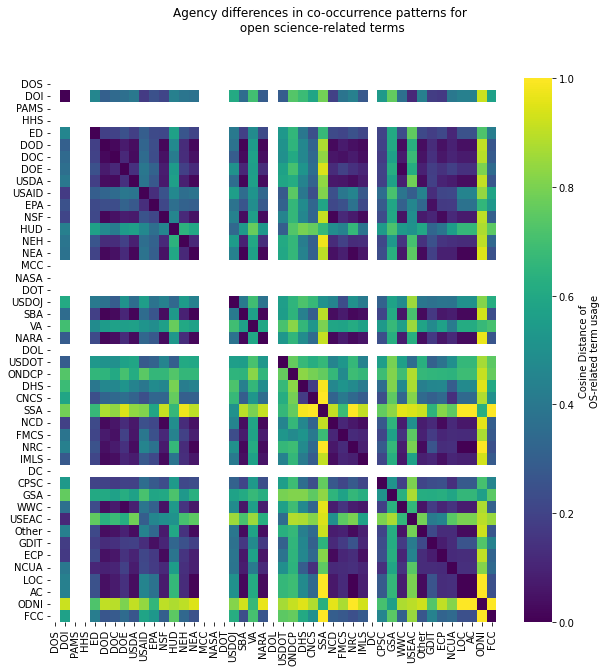

In [ ]:
import scipy

normalizeVecs=True

# quick definition of normalize function
def normalizeVector(inputVec):
    # note, these are counts so they are necessarily positive
    # if it's not empty
    if not np.sum(inputVec)==0:
        normalizedVector=np.divide(inputVec,np.sum(inputVec))
    else: 
        # otherwise
        normalizedVector=inputVec
    return normalizedVector

# create a holder for the cosine distance analysis
cosineDists_agency=np.zeros([len(uniqueAgencies),len(uniqueAgencies)])

#once the co-occurrence stack is complete, perform the cosine analysis
for iIndexX, iAgenciesX in enumerate(uniqueAgencies):
    for iIndexY, iAgenciesY in enumerate(uniqueAgencies):
        # get the stack slice for each agency
        agencyX_slice=countArray[:,:,iIndexX]
        agencyY_slice=countArray[:,:,iIndexY]
        
        # flatten it into a single vector for each
        agencyX_vec=np.ravel(agencyX_slice)
        agencyY_vec=np.ravel(agencyY_slice)
        
        if (not np.sum(agencyX_vec)==0) and (not np.sum(agencyY_vec)==0):
        
            # if we want to normalize, do that
            if normalizeVecs:
                agencyX_vec=normalizeVector(agencyX_vec)
                agencyY_vec=normalizeVector(agencyY_vec)

            #in either case, perform the cosine analysis
            currentDistance=scipy.spatial.distance.cosine(agencyX_vec,agencyY_vec)
            # set it in the output matrix
        
        
            cosineDists_agency[iIndexX,iIndexY]=currentDistance
        else:
            cosineDists_agency[iIndexX,iIndexY]=np.nan
        
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Agency differences in co-occurrence patterns for\n open science-related terms')
# plot the result
sns.heatmap(data=cosineDists_agency, cmap='viridis', yticklabels=uniqueAgencies,xticklabels=uniqueAgencies,cbar_kws={'label': 'Cosine Distance of\nOS-related term usage'})